# REPORT

According to a predictive model built on the given dataset, the top six most important predictors of hotel cancellations were identified as follows:

Lead time: The number of days between the booking and the arrival date was found to be the most significant predictor of hotel cancellations. This suggests that customers are more likely to cancel their bookings the further out the booking is made.

Average price per room: The average price per room for the booking was found to be the second most important predictor. This indicates that customers may be more likely to cancel bookings if they feel they are not getting good value for their money.

Number of special requests: The number of special requests made by the customer was identified as the third most important predictor. This suggests that customers who make more special requests may be more likely to cancel their bookings.

Arrival month: The month of the arrival date was identified as the fourth most important predictor. This indicates that hotel cancellations may be more likely to occur during certain months of the year.

Arrival date: The day of the month of the arrival date was found to be the fifth most important predictor. This suggests that hotel cancellations may be more likely to occur on certain days of the month.

Market segment type: The type of market segment the booking belongs to was identified as the sixth most important predictor. This suggests that cancellations may be more likely to occur for bookings made through certain market segments.

Overall, these findings suggest that hotel cancellations are influenced by a variety of factors, including the timing and price of the booking, the number of special requests made by the customer, and the type of market segment the booking belongs to. Hotel managers could use this information to better understand the factors that contribute to cancellations and develop strategies to minimize cancellations, such as offering incentives for customers who book closer to the arrival date, or targeting certain market segments with customized marketing campaigns.

# LIBRARIES 

In [1]:
pkgs <- c("tidyverse", "tidymodels", "vip","pacman","ggthemes","ggridges","dlookr")
not_installed <- pkgs[!(pkgs %in% installed.packages()[, "Package"])]
if (length(not_installed) > 0) {
  install.packages(not_installed)
}
pacman::p_load(pkgs, character.only = TRUE)

# THE DATA 

In [2]:
hotels <- 
  read_csv('data/hotel_bookings.csv', show_col_types = FALSE) %>%
  mutate(across(where(is.character), as.factor)) %>%
  glimpse()

Rows: 36,275
Columns: 19
$ Booking_ID                           <fct> INN00001, INN00002, INN00003, INN~
$ no_of_adults                         <dbl> NA, 2, 1, 2, 2, 2, 2, 2, 3, 2, 1,~
$ no_of_children                       <dbl> NA, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,~
$ no_of_weekend_nights                 <dbl> NA, 2, 2, 0, 1, 0, 1, 1, 0, 0, 1,~
$ no_of_week_nights                    <dbl> NA, 3, 1, 2, 1, 2, 3, 3, 4, 5, 0,~
$ type_of_meal_plan                    <fct> NA, Not Selected, Meal Plan 1, Me~
$ required_car_parking_space           <dbl> NA, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,~
$ room_type_reserved                   <fct> NA, Room_Type 1, Room_Type 1, Roo~
$ lead_time                            <dbl> NA, 5, 1, 211, 48, 346, 34, 83, 1~
$ arrival_year                         <dbl> NA, 2018, 2018, 2018, 2018, 2018,~
$ arrival_month                        <dbl> NA, 11, 2, 5, 4, 9, 10, 12, 7, 10~
$ arrival_date                         <dbl> NA, 6, 28, 20, 11, 13, 15, 26, 6,~
$ market_segmen

In [3]:
hotels %>% diagnose() 
hotels %>% diagnose_category()
hotels %>% diagnose_numeric()

variables,types,missing_count,missing_percent,unique_count,unique_rate
<chr>,<chr>,<int>,<dbl>,<int>,<dbl>
Booking_ID,factor,0,0.0000000,36275,1.000000e+00
no_of_adults,numeric,413,1.1385252,6,1.654032e-04
no_of_children,numeric,324,0.8931771,7,1.929704e-04
no_of_weekend_nights,numeric,367,1.0117161,9,2.481048e-04
no_of_week_nights,numeric,807,2.2246726,19,5.237767e-04
type_of_meal_plan,factor,526,1.4500345,5,1.378360e-04
required_car_parking_space,numeric,2592,7.1454170,3,8.270159e-05
room_type_reserved,factor,1171,3.2281185,8,2.205376e-04
lead_time,numeric,472,1.3011716,353,9.731220e-03


variables,levels,N,freq,ratio,rank
<chr>,<chr>,<int>,<int>,<dbl>,<int>
Booking_ID,INN00001,36275,1,0.00275672,1
Booking_ID,INN00002,36275,1,0.00275672,1
Booking_ID,INN00003,36275,1,0.00275672,1
Booking_ID,INN00004,36275,1,0.00275672,1
Booking_ID,INN00005,36275,1,0.00275672,1
Booking_ID,INN00006,36275,1,0.00275672,1
Booking_ID,INN00007,36275,1,0.00275672,1
Booking_ID,INN00008,36275,1,0.00275672,1
Booking_ID,INN00009,36275,1,0.00275672,1


variables,min,Q1,mean,median,Q3,max,zero,minus,outlier
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
no_of_adults,0,2.0,1.845017e+00,2.00,2,4,137,0,10049
no_of_children,0,0.0,1.053656e-01,0.00,0,10,33275,0,2676
no_of_weekend_nights,0,0.0,8.102094e-01,1.00,2,7,16715,0,21
no_of_week_nights,0,1.0,2.203310e+00,2.00,3,17,2327,0,313
required_car_parking_space,0,0.0,3.069798e-02,0.00,0,1,32649,0,1034
lead_time,0,17.0,8.527657e+01,57.00,126,443,1277,0,1317
arrival_year,2017,2018.0,2.017820e+03,2018.00,2018,2018,0,0,6446
arrival_month,1,5.0,7.424031e+00,8.00,10,12,0,0,0
arrival_date,1,8.0,1.560571e+01,16.00,23,31,0,0,0


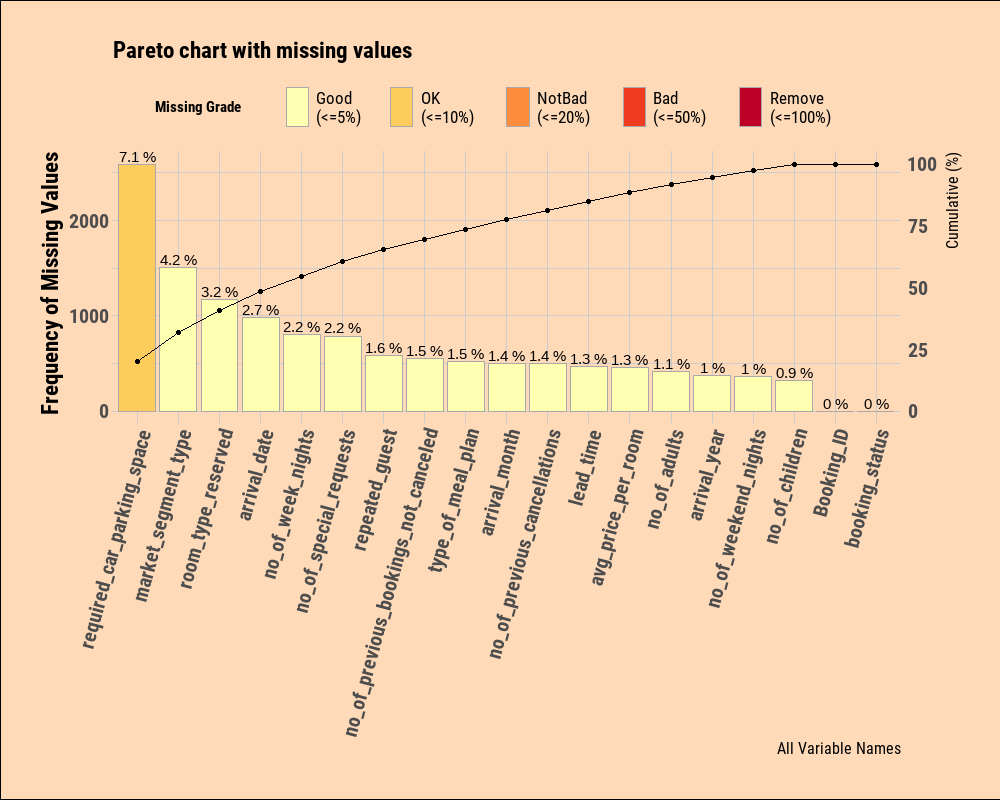

In [4]:
options(repr.plot.width = 10, repr.plot.height = 8, repr.plot.res =100)

bgr = theme(plot.background = element_rect(fill="#FFDAB9"),
             plot.title = element_text(size=17),
             axis.title.y = element_text(size=17, face = "bold"),
             axis.text.x = element_text(size=15,face = "bold",angle = 75),
             axis.text.y = element_text(size=15,face = "bold"),
             legend.text = element_text(size=13),
             legend.title = element_text(size=11.5,face = "bold"))


hotels %>% 
  plot_na_pareto()+
  bgr

To build our models, we will exclude the "Booking_ID" as it does not seem to provide any meaningful information. Additionally, we will perform some basic preprocessing steps on our data.

In [5]:
hotels <- hotels %>%
  select(-c(Booking_ID)) %>%
  drop_na() %>%
  mutate(booking_status = factor(booking_status, levels = c("Canceled", "Not_Canceled"))) %>%
  mutate(required_car_parking_space = case_when(
         required_car_parking_space > 0 ~ "parking",
         TRUE ~ "none")
         )

hotels %>% glimpse()

Rows: 27,511
Columns: 18
$ no_of_adults                         <dbl> 2, 1, 2, 2, 2, 2, 2, 3, 2, 1, 1, ~
$ no_of_children                       <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ no_of_weekend_nights                 <dbl> 2, 2, 0, 1, 0, 1, 1, 0, 0, 1, 2, ~
$ no_of_week_nights                    <dbl> 3, 1, 2, 1, 2, 3, 3, 4, 5, 0, 1, ~
$ type_of_meal_plan                    <fct> Not Selected, Meal Plan 1, Meal P~
$ required_car_parking_space           <chr> "none", "none", "none", "none", "~
$ room_type_reserved                   <fct> Room_Type 1, Room_Type 1, Room_Ty~
$ lead_time                            <dbl> 5, 1, 211, 48, 346, 34, 83, 121, ~
$ arrival_year                         <dbl> 2018, 2018, 2018, 2018, 2018, 201~
$ arrival_month                        <dbl> 11, 2, 5, 4, 9, 10, 12, 7, 10, 9,~
$ arrival_date                         <dbl> 6, 28, 20, 11, 13, 15, 26, 6, 18,~
$ market_segment_type                  <fct> Online, Online, Online, Online, O~
$ repeated_gues

In [6]:
hotels %>% 
  count(booking_status) %>% 
  mutate(prop = scales::percent(n/sum(n), accuracy = 0.1))

booking_status,n,prop
<fct>,<int>,<chr>
Canceled,9010,32.8%
Not_Canceled,18501,67.2%


# TRAIN - TEST - VALIDATION SPLITS

In [7]:
set.seed(123)
splits <- initial_split(hotels, strata = booking_status )

hotel_other <- training(splits)
hotel_test  <- testing(splits)

# training set proportions by booking_status
hotel_other %>% 
  count(booking_status ) %>% 
  mutate(prop = scales::percent(n/sum(n), accuracy = 0.1))


# test set proportions by booking_status
hotel_test  %>% 
  count(booking_status) %>% 
  mutate(prop = scales::percent(n/sum(n), accuracy = 0.1))

booking_status,n,prop
<fct>,<int>,<chr>
Canceled,6757,32.8%
Not_Canceled,13875,67.2%


booking_status,n,prop
<fct>,<int>,<chr>
Canceled,2253,32.8%
Not_Canceled,4626,67.2%


In [8]:
set.seed(234)
val_set <- validation_split(hotel_other, strata = booking_status, prop = .8)
val_set %>%  glimpse()

Rows: 1
Columns: 2
$ splits <list> [<val_split[16505 x 4127 x 20632 x 18]>]
$ id     <chr> "validation"


# FIRST MODEL: PENALIZED LOGISTIC REGRESSION

In [9]:
lr_mod <- 
  logistic_reg(penalty = tune(), mixture = 1) %>% 
  set_engine("glmnet")

Setting mixture to a value of one means that the glmnet model will potentially remove irrelevant predictors and choose a simpler model.

# THE RECIPE

In [10]:
lr_recipe <- 
  recipe(booking_status ~ ., data = hotel_other) %>% 
  step_dummy(all_nominal_predictors()) %>% 
  step_zv(all_predictors()) %>% 
  step_normalize(all_predictors())

# THE WORKFLOW

In [11]:
lr_workflow <- 
  workflow() %>% 
  add_model(lr_mod) %>% 
  add_recipe(lr_recipe)

# THE GRID FOR TUNING

In [12]:
lr_reg_grid <- tibble(penalty = 10^seq(-4, -1, length.out = 30))

lr_reg_grid %>% top_n(-5) # lowest penalty values
lr_reg_grid %>% top_n(5)  # highest penalty values

Selecting by penalty


penalty
<dbl>
0.0001000000
0.0001268961
0.0001610262
0.0002043360
0.0002592944


Selecting by penalty


penalty
<dbl>
0.03856620
0.04893901
0.06210169
0.07880463
0.10000000


# TRAIN AND TUNE THE MODEL

In [13]:
lr_res <- 
  lr_workflow %>% 
  tune_grid(val_set,
            grid = lr_reg_grid,
            control = control_grid(save_pred = TRUE),
            metrics = metric_set(roc_auc))

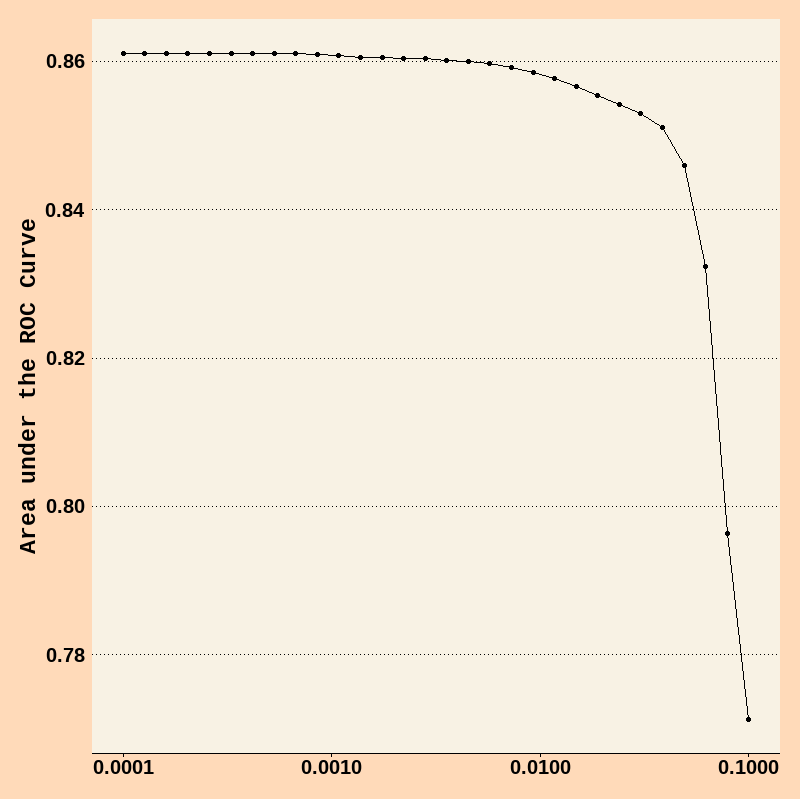

In [14]:
options(repr.plot.width = 8, repr.plot.height = 8, repr.plot.res =100)

bgr2 = theme(plot.background = element_rect(fill="#FFDAB9"),
             axis.title.y = element_text(size=17, face = "bold"),
             axis.text.x = element_text(size=15,face = "bold"),
             axis.text.y = element_text(size=15,face = "bold"))

lr_plot <- 
  lr_res %>% 
  collect_metrics() %>% 
  ggplot(aes(x = penalty, y = mean)) + 
  geom_point() + 
  geom_line() + 
  ylab("Area under the ROC Curve") +
  scale_x_log10(labels = scales::label_number())+
  theme_wsj()+
  bgr2

lr_plot 

This plots shows us that model performance is generally better at the smaller penalty values. This suggests that the majority of the predictors are important to the model. We also see a steep drop in the area under the ROC curve towards the highest penalty values. This happens because a large enough penalty will remove all predictors from the model, and not surprisingly predictive accuracy plummets with no predictors in the model (recall that an ROC AUC value of 0.50 means that the model does no better than chance at predicting the correct class).

In [15]:
top_models <-
  lr_res %>% 
  show_best("roc_auc", n = 15) %>% 
  arrange(penalty) 
top_models 

penalty,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
0.0001000000,roc_auc,binary,0.8611040,1,NA,Preprocessor1_Model01
0.0001268961,roc_auc,binary,0.8611040,1,NA,Preprocessor1_Model02
0.0001610262,roc_auc,binary,0.8611040,1,NA,Preprocessor1_Model03
0.0002043360,roc_auc,binary,0.8611085,1,NA,Preprocessor1_Model04
0.0002592944,roc_auc,binary,0.8611096,1,NA,Preprocessor1_Model05
0.0003290345,roc_auc,binary,0.8611075,1,NA,Preprocessor1_Model06
0.0004175319,roc_auc,binary,0.8610931,1,NA,Preprocessor1_Model07
0.0005298317,roc_auc,binary,0.8610933,1,NA,Preprocessor1_Model08
0.0006723358,roc_auc,binary,0.8610494,1,NA,Preprocessor1_Model09


In [16]:
top_models <-
  lr_res %>% 
  select_best("roc_auc", n = 15) %>% 
  arrange(penalty) 
top_models

penalty,.config
<dbl>,<chr>
0.0002592944,Preprocessor1_Model05


In [17]:
lr_best <- 
  lr_res %>% 
  collect_metrics() %>% 
  arrange(penalty) %>% 
  slice(5)
lr_best

penalty,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
0.0002592944,roc_auc,binary,0.8611096,1,NA,Preprocessor1_Model05


Warning message:
"Returning more (or less) than 1 row per `summarise()` group was deprecated in dplyr 1.1.0.
i Please use `reframe()` instead.
i When switching from `summarise()` to `reframe()`, remember that `reframe()` always returns an ungrouped data frame
  and adjust accordingly.
i The deprecated feature was likely used in the yardstick package.
  Please report the issue at <https://github.com/tidymodels/yardstick/issues>."


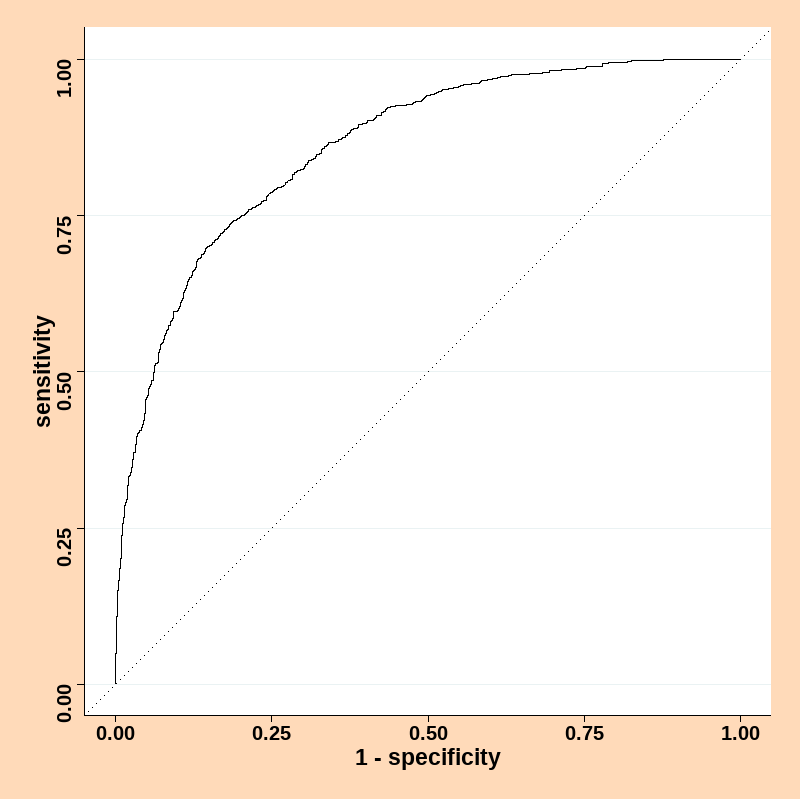

In [18]:
options(repr.plot.width = 8, repr.plot.height = 8, repr.plot.res =100)

bgr3 = theme(plot.background = element_rect(fill="#FFDAB9"),
             axis.title.y = element_text(size=17, face = "bold"),
             axis.title.x = element_text(size=17, face = "bold"),
             axis.text.x = element_text(size=15,face = "bold"),
             axis.text.y = element_text(size=15,face = "bold"))

lr_auc <- 
  lr_res %>% 
  collect_predictions(parameters = lr_best) %>% 
  roc_curve(booking_status, .pred_Canceled) %>% 
  mutate(model = "Logistic Regression")

autoplot(lr_auc)+
 theme_stata() +
 bgr3

# SECOND MODEL: TREE-BASED ENSEMBLE

An effective and low-maintenance modeling technique is a random forest.
Although the default hyperparameters for random forests tend to give reasonable results, we’ll plan to tune two hyperparameters that we think could improve performance.Unfortunately, random forest models can be computationally expensive to train and to tune. The computations required for model tuning can usually be easily parallelized to improve training time. The tune package can do parallel processing for you, and allows users to use multiple cores or separate machines to fit models.

In [19]:
cores <- parallel::detectCores()
cores

[1] 8

In [20]:
rf_mod <- 
  rand_forest(mtry = tune(), min_n = tune(), trees = 1000) %>% 
  set_engine("ranger", num.threads = cores) %>% 
 # set_engine("ranger") %>% 
  set_mode("classification")

# THE RECIPE

In [21]:
rf_recipe <- 
  recipe(booking_status ~ ., data = hotel_other) 

# THE WORKFLOW

In [22]:
rf_workflow <- 
  workflow() %>% 
  add_model(rf_mod) %>% 
  add_recipe(rf_recipe)

# TRAIN AND TUNE THE MODEL

In [23]:
# rf_mod

# show what will be tuned
# extract_parameter_set_dials(rf_mod)

We will use a space-filling design to tune, with 25 candidate models:

In [24]:
set.seed(345)
rf_res <- 
  rf_workflow %>% 
  tune_grid(val_set,
            grid = 25,
            control = control_grid(save_pred = TRUE),
            metrics = metric_set(roc_auc))

i Creating pre-processing data to finalize unknown parameter: mtry



The message printed above “Creating pre-processing data to finalize unknown parameter: mtry” is related to the size of the data set. Since mtry depends on the number of predictors in the data set, tune_grid() determines the upper bound for mtry once it receives the data. 

Here are our top 5 random forest models, out of the 25 candidates:

mtry,min_n,.metric,.estimator,mean,n,std_err,.config
<int>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
5,7,roc_auc,binary,0.9448260,1,NA,Preprocessor1_Model13
8,4,roc_auc,binary,0.9446856,1,NA,Preprocessor1_Model05
6,12,roc_auc,binary,0.9444429,1,NA,Preprocessor1_Model19
8,7,roc_auc,binary,0.9442899,1,NA,Preprocessor1_Model01
11,11,roc_auc,binary,0.9438504,1,NA,Preprocessor1_Model09


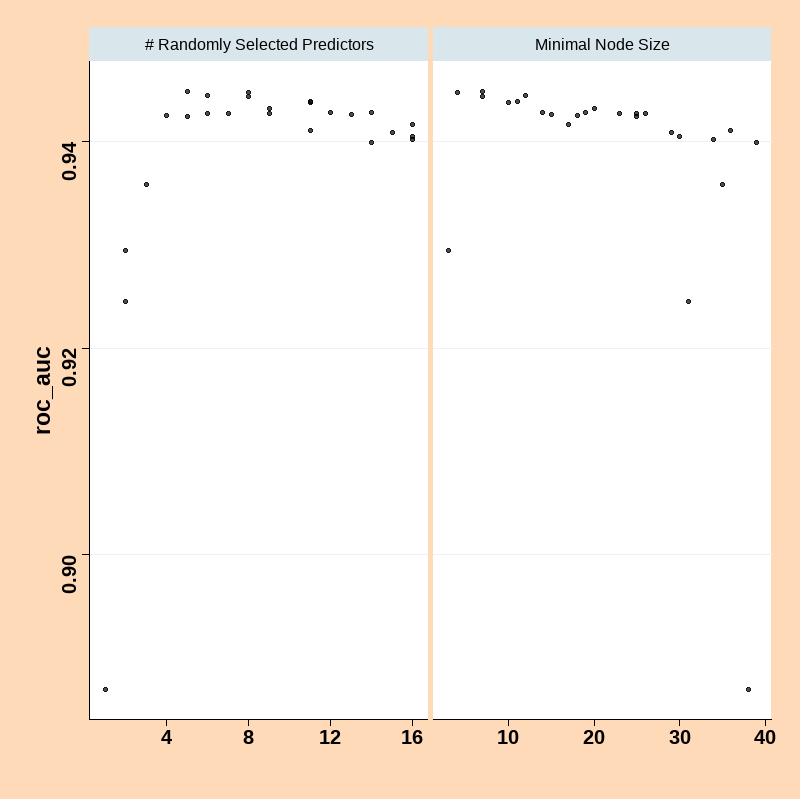

In [25]:
bgr4 = theme(plot.background = element_rect(fill="#FFDAB9"),
             axis.title.y = element_text(size=17, face = "bold"),
            # axis.title.x = element_text(size=17, face = "bold"),
             axis.text.x = element_text(size=15,face = "bold"),
             axis.text.y = element_text(size=15,face = "bold"))

rf_res %>% 
  show_best(metric = "roc_auc")

autoplot(rf_res)+theme_stata()+bgr4

Right away, we see that these values for area under the ROC look more promising than our top model using penalized logistic regression, which yielded an ROC AUC of 0.861.

Let’s select the best model according to the ROC AUC metric. Our final tuning parameter values are:

In [26]:
rf_best <- 
  rf_res %>% 
  select_best(metric = "roc_auc")
rf_best

mtry,min_n,.config
<int>,<int>,<chr>
5,7,Preprocessor1_Model13


To calculate the data needed to plot the ROC curve, we use collect_predictions(). This is only possible after tuning with control_grid(save_pred = TRUE). In the output, you can see the two columns that hold our class probabilities for predicting hotel cancellations.

To filter the predictions for only our best random forest model, we can use the parameters argument and pass it our tibble with the best hyperparameter values from tuning, which we called rf_best:

In [27]:
rf_auc <- 
  rf_res %>% 
  collect_predictions(parameters = rf_best) %>% 
  roc_curve(booking_status, .pred_Canceled) %>% 
  mutate(model = "Random Forest")

Now, we can compare the validation set ROC curves for our top penalized logistic regression model and random forest model:

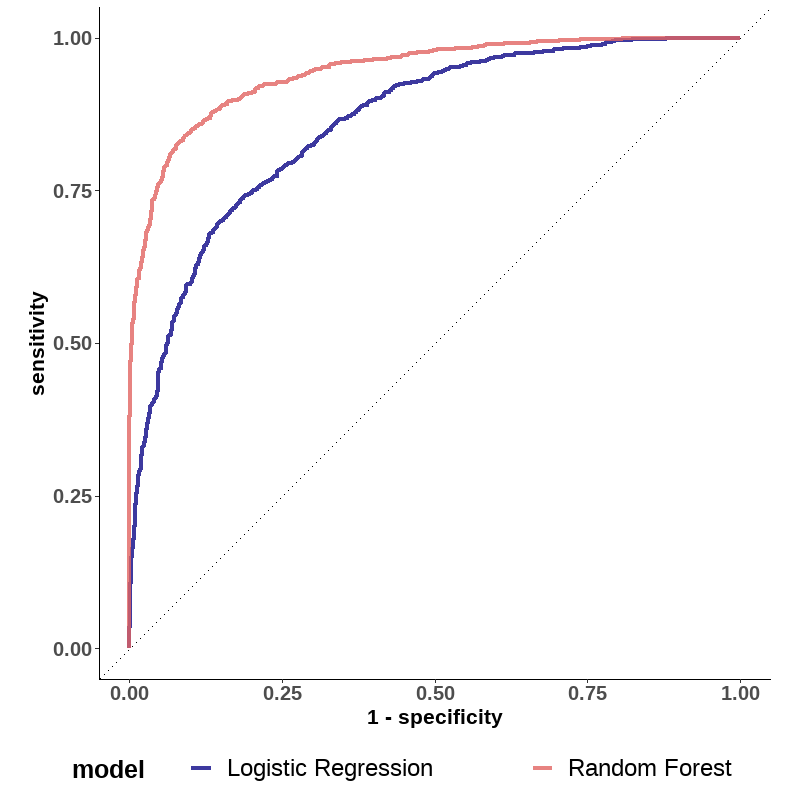

In [28]:
bgr5 = theme(
             axis.title.x = element_text(size=16,face = "bold"),
             axis.title.y = element_text(size=16,face = "bold"),
             axis.text.x = element_text(size=15,face = "bold", angle = 0),
             axis.text.y = element_text(size=15,face = "bold"),
             legend.text = element_text(size=18, color="black"),
             legend.title = element_text(size=19,face = "bold"),
             legend.position = "bottom")

bind_rows(rf_auc, lr_auc) %>% 
  ggplot(aes(x = 1 - specificity, y = sensitivity, col = model)) + 
  geom_path(linewidth = 1.5, alpha = 0.8) +
  geom_abline(lty = 3) + 
  coord_equal() + 
  scale_color_viridis_d(option = "plasma", end = .6) + 
  theme_classic() + bgr5

The random forest is uniformly better across event probability thresholds.

# THIRD MODEL: XGBOOST

In [29]:
xgb_recipe <- 
  recipe(booking_status ~ ., data = hotel_other) %>%
  step_dummy(all_nominal_predictors())

xgb_spec <- boost_tree(
  trees = 1000,                                
  tree_depth = tune(),                             
  min_n = tune(),                                
  loss_reduction =tune(),                         
  mtry = tune(),              
  learn_rate = tune(),   
  sample_size = tune()    
) %>%
  set_engine("xgboost",num.threads = cores) %>%  
  set_mode("classification") 

#  workflow 

xgb_workflow <- 
  workflow() %>%
  add_recipe(xgb_recipe) %>%
  add_model(xgb_spec)

# xgb_spec 

In [30]:
set.seed(345)
xgb_res <- 
  xgb_workflow %>% 
  tune_grid(val_set,
            grid = 25,
            control = control_grid(save_pred = TRUE),
            metrics = metric_set(roc_auc))

i Creating pre-processing data to finalize unknown parameter: mtry



mtry,min_n,tree_depth,learn_rate,loss_reduction,sample_size,.metric,.estimator,mean,n,std_err,.config
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
6,4,7,0.020136858,2.058147e-09,0.7759475,roc_auc,binary,0.9424340,1,NA,Preprocessor1_Model05
13,13,9,0.028878421,1.769484e+00,0.6318672,roc_auc,binary,0.9398150,1,NA,Preprocessor1_Model17
23,13,8,0.172229928,6.750060e-07,0.8884396,roc_auc,binary,0.9388800,1,NA,Preprocessor1_Model21
16,20,12,0.007181982,1.970398e-06,0.7279449,roc_auc,binary,0.9332960,1,NA,Preprocessor1_Model24
12,36,11,0.095348627,2.869442e-01,0.6634317,roc_auc,binary,0.9310001,1,NA,Preprocessor1_Model11


mtry,min_n,tree_depth,learn_rate,loss_reduction,sample_size,.config
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
6,4,7,0.02013686,2.058147e-09,0.7759475,Preprocessor1_Model05


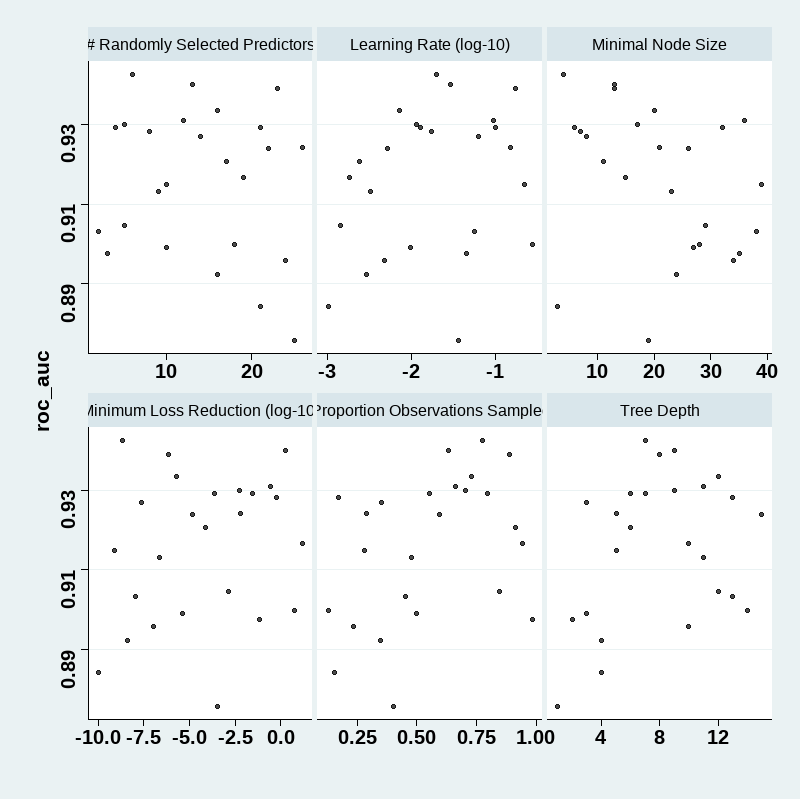

In [31]:
bgr6 = theme(
           #  axis.title.x = element_text(size=16,face = "bold"),
             axis.title.y = element_text(size=16,face = "bold"),
             axis.text.x = element_text(size=15,face = "bold", angle = 0),
             axis.text.y = element_text(size=15,face = "bold"))
xgb_res %>% 
  show_best(metric = "roc_auc")

autoplot(xgb_res)+theme_stata()+bgr6

xgb_best <- 
  xgb_res %>% 
  select_best(metric = "roc_auc")
xgb_best

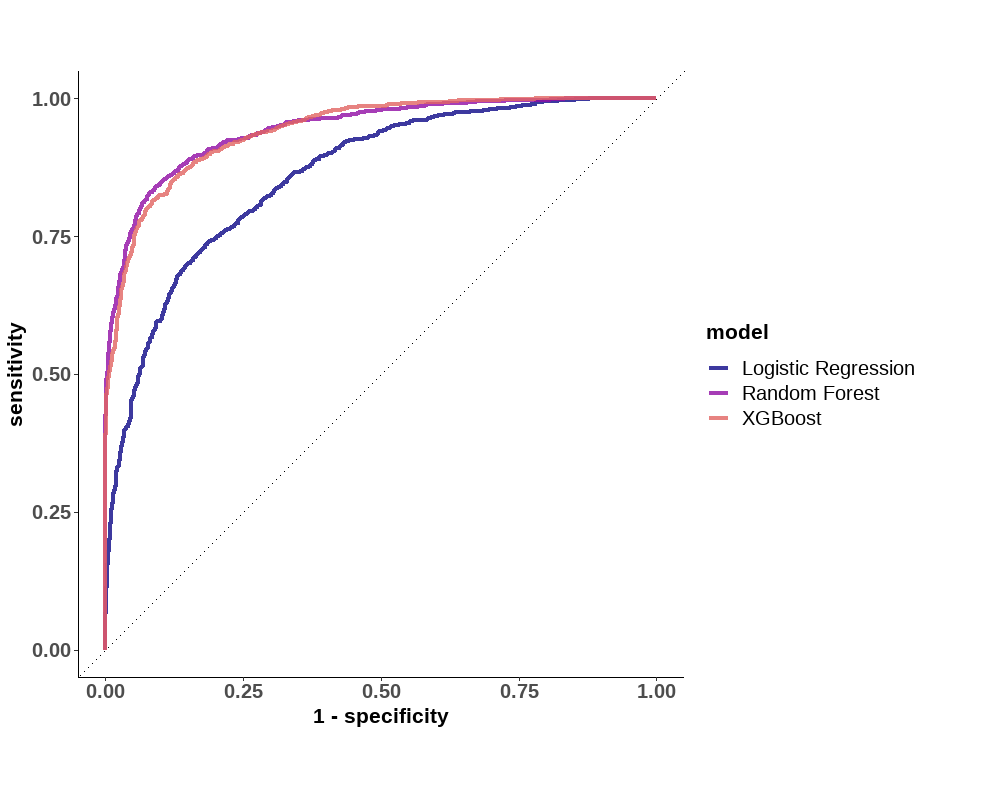

In [32]:
options(repr.plot.width = 10, repr.plot.height = 8, repr.plot.res =100)

bgr7 = theme(
             axis.title.x = element_text(size=16,face = "bold"),
             axis.title.y = element_text(size=16,face = "bold"),
             axis.text.x = element_text(size=15,face = "bold", angle = 0),
             axis.text.y = element_text(size=15,face = "bold"),
             legend.text = element_text(size=15, color="black"),
             legend.title = element_text(size=16,face = "bold"))
             # legend.position = "up")

xgb_auc <- 
  xgb_res %>% 
  collect_predictions(parameters = xgb_best) %>% 
  roc_curve(booking_status, .pred_Canceled) %>% 
  mutate(model = "XGBoost")

bind_rows(xgb_auc, rf_auc, lr_auc) %>% 
  ggplot(aes(x = 1 - specificity, y = sensitivity, col = model)) + 
  geom_path(linewidth = 1.5, alpha = 0.8) +
  geom_abline(lty = 3) + 
  coord_equal() + 
  scale_color_viridis_d(option = "plasma", end = .6)+
  theme_classic() +
  bgr7

# THE LAST FIT

Our goal was to predict hotel cancellations. The random forest model clearly performed better than the penalized logistic regression model and slightly better than XGBoost so it would be our best bet for predicting hotel cancellations. After selecting our best model and hyperparameter values, our last step is to fit the final model on all the rows of data not originally held out for testing (both the training and the validation sets combined), and then evaluate the model performance one last time with the held-out test set.

We’ll start by building our parsnip model object again from scratch. We take our best hyperparameter values from our random forest model. When we set the engine, we add a new argument: importance = "impurity". This will provide variable importance scores for this last model, which gives some insight into which predictors drive model performance

In [33]:
# the last model
last_rf_mod <- 
  rand_forest(mtry = 5, min_n = 7, trees = 1000) %>% 
  set_engine("ranger", num.threads = cores, importance = "impurity") %>% 
  #set_engine("ranger", importance = "impurity") %>% 
  set_mode("classification")

# the last workflow
last_rf_workflow <- 
  workflow() %>% 
  add_model(last_rf_mod) %>% 
  add_recipe(rf_recipe)

# the last fit
set.seed(345)
last_rf_fit <- 
  last_rf_workflow %>% 
  last_fit(splits)

This fitted workflow contains everything, including our final metrics based on the test set. So, how did this model do on the test set? Was the validation set a good estimate of future performance?

In [34]:
last_rf_fit %>% 
  collect_metrics()

.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,0.9002762,Preprocessor1_Model1
roc_auc,binary,0.9568124,Preprocessor1_Model1


This ROC AUC value is pretty close to what we saw when we tuned the random forest model with the validation set, which is good news. That means that our estimate of how well our model would perform with new data was not too far off from how well our model actually performed with the unseen test data.

We can access those variable importance scores via the .workflow column. We can extract out the fit from the workflow object, and then use the vip package to visualize the variable importance scores for the top 15 features:

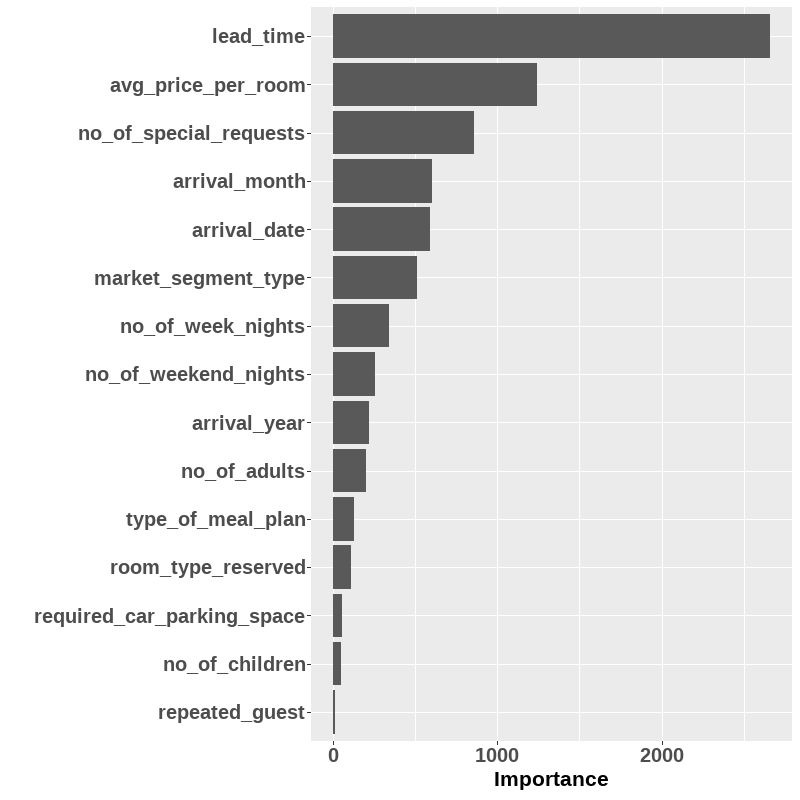

In [35]:
options(repr.plot.width = 8, repr.plot.height = 8, repr.plot.res =100)

bgr8 = theme(
             axis.title.x = element_text(size=16,face = "bold"),
             axis.title.y = element_text(size=16,face = "bold"),
             axis.text.x = element_text(size=15,face = "bold", angle = 0),
             axis.text.y = element_text(size=15,face = "bold"))

last_rf_fit %>% 
  extract_fit_parsnip() %>% 
  vip(num_features =15)+bgr8

The top six most important predictors were the lead_time, the avg_price_per_room, the no_of_special_requests, the arrival_month, the arrival_date and the market_segment_type.

Let’s generate our last ROC curve to visualize. 

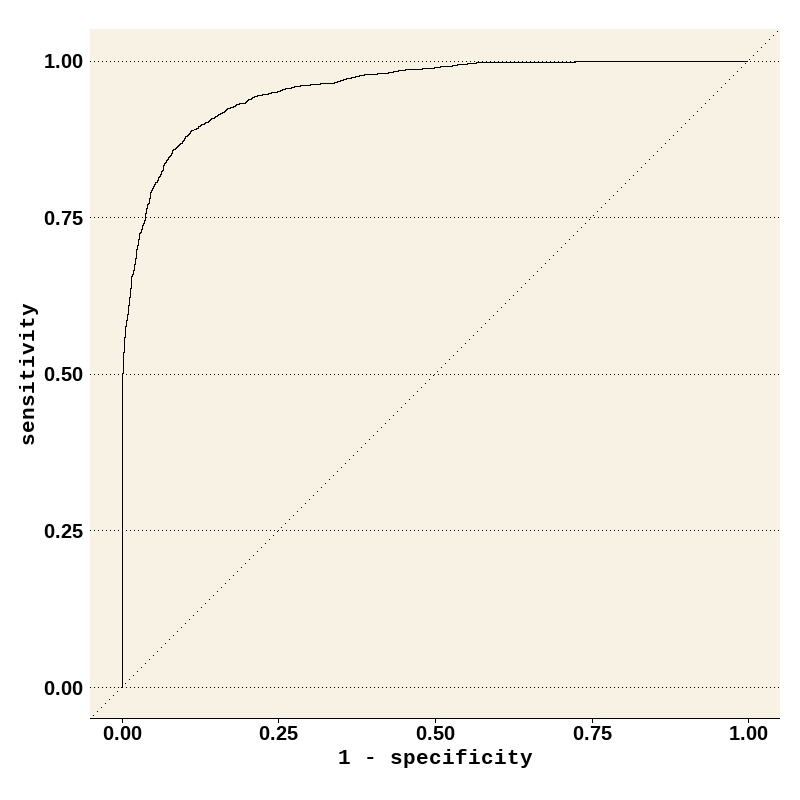

In [36]:
bgr9 = theme(plot.background = element_rect(fill="white"),
             axis.title.x = element_text(size=16,face = "bold"),
             axis.title.y = element_text(size=16,face = "bold"),
             axis.text.x = element_text(size=15,face = "bold", angle = 0),
             axis.text.y = element_text(size=15,face = "bold"))

last_rf_fit %>% 
  collect_predictions() %>% 
  roc_curve(booking_status, .pred_Canceled) %>% 
  autoplot() + 
  theme_wsj() + 
  bgr9

Based on these results, the validation set and test set performance statistics are very close, so we would have pretty high confidence that our random forest model with the selected hyperparameters would perform well when predicting new data.

# VISUALIZATIONS

In this section, we will enhance the presentation of our findings through visualizations.

In [37]:
df <- hotels %>% 
  select(lead_time, avg_price_per_room, no_of_special_requests, 
         arrival_month, arrival_date, market_segment_type,booking_status,arrival_year) %>%
  mutate(arrival_month = as.character(arrival_month), 
         months = factor(arrival_month, levels = as.character(1:12),labels = month.name))

df %>% glimpse()

Rows: 27,511
Columns: 9
$ lead_time              <dbl> 5, 1, 211, 48, 346, 34, 83, 121, 44, 0, 35, 30,~
$ avg_price_per_room     <dbl> 106.68, 60.00, 100.00, 94.50, 115.00, 107.55, 1~
$ no_of_special_requests <dbl> 1, 0, 0, 0, 1, 1, 1, 1, 3, 0, 1, 0, 2, 1, 0, 1,~
$ arrival_month          <chr> "11", "2", "5", "4", "9", "10", "12", "7", "10"~
$ arrival_date           <dbl> 6, 28, 20, 11, 13, 15, 26, 6, 18, 11, 30, 26, 2~
$ market_segment_type    <fct> Online, Online, Online, Online, Online, Online,~
$ booking_status         <fct> Not_Canceled, Canceled, Canceled, Canceled, Can~
$ arrival_year           <dbl> 2018, 2018, 2018, 2018, 2018, 2017, 2018, 2018,~
$ months                 <fct> November, February, May, April, September, Octo~


In [38]:
tema = theme(plot.background = element_rect(fill="#FFDAB9"),
             plot.title = element_text(size=18, hjust=.5),
             axis.title.x = element_text(size=16, color = "black",hjust=.5, vjust=-3,face = "bold"),
             axis.title.y = element_text(size=16, color = "black",hjust=.5, vjust=3,face = "bold"),
             axis.text.x = element_text(size=15,hjust=.5, vjust=0.5,face = "bold"),
             axis.text.y = element_text(size=15,face = "bold",hjust=.5),
             legend.text = element_text(size=15, color="black"),
             legend.title = element_text(size=15,face = "bold"))


p1<-ggplot(df, aes(x = booking_status, y = lead_time, fill = booking_status)) +
  geom_boxplot() +
  labs(x = "Booking Status", y = "Lead Time") +
  ggtitle("Lead Time Boxplot by Booking Status") +
  theme_wsj()+
  tema

p2<-ggplot(df, aes(x = lead_time, fill = booking_status)) +
  geom_density(alpha = .8) +
  labs(x = "Lead Time", y = NULL) +
  ggtitle("Distribution of Lead Time\n by Booking Status") +
  theme_wsj()+
  tema

p3<-ggplot(df, aes(x = lead_time, fill = booking_status, y = booking_status, color = booking_status))+
  geom_density_ridges(mapping = aes(fill = booking_status), color = "black", size = 1, alpha = .8)+
  labs(x = "Lead Time", y=NULL)+
  theme_wsj()+
  tema


p4<-ggplot(df, aes(x = booking_status, y = avg_price_per_room, fill = booking_status)) +
  geom_boxplot() +
  labs(x = "Booking Status", y = "Avg price per room") +
  ggtitle("Avg price per_room Boxplot\n by Booking Status") +
  theme_wsj()+
  tema+
  coord_flip()

p5<-ggplot(df, aes(x= avg_price_per_room, fill = booking_status)) +
  geom_density(alpha = .8) +
  labs(x = "Avg price per room", y = NULL) +
  ggtitle("Distribution of Avg price per room\n by Booking Status") +
  theme_wsj()+
  tema

p6<-ggplot(df, aes(x = avg_price_per_room, fill = booking_status, y = booking_status, color = booking_status))+
  geom_density_ridges(mapping = aes(fill = booking_status), color = "black", size = 1, alpha = .8)+
  labs(x = "Avg price per room", y=NULL)+
  theme_wsj()+
  tema


p7<-ggplot(df, aes(x = booking_status, y = no_of_special_requests, fill = booking_status)) +
  geom_boxplot() +
  labs(x = "Booking Status", y = "No of Special Requests") +
  ggtitle("No of Special Requests Boxplot\n by Booking Status") +
  theme_wsj()+
  tema+
  coord_flip()

p8<-ggplot(df, aes(x = no_of_special_requests, fill = booking_status)) +
  geom_density(alpha = .8) +
  labs(x = "No of Special Requests", y = NULL) +
  ggtitle("Distribution of No of Special Requests\n by Booking Status") +
  theme_wsj()+
  tema

p9<-ggplot(df, aes(x = no_of_special_requests, fill = booking_status, y = booking_status, color = booking_status))+
  geom_density_ridges(mapping = aes(fill = booking_status), color = "black", size = 1, alpha = .8)+
  labs(x = "No of Special Requests", y=NULL)+
  theme_wsj()+
  tema

plot_list <- list(p1, p2, p3, p4, p5, p6, p7, p8, p9)

Picking joint bandwidth of 10.8

Picking joint bandwidth of 3.98

Picking joint bandwidth of 0.0888



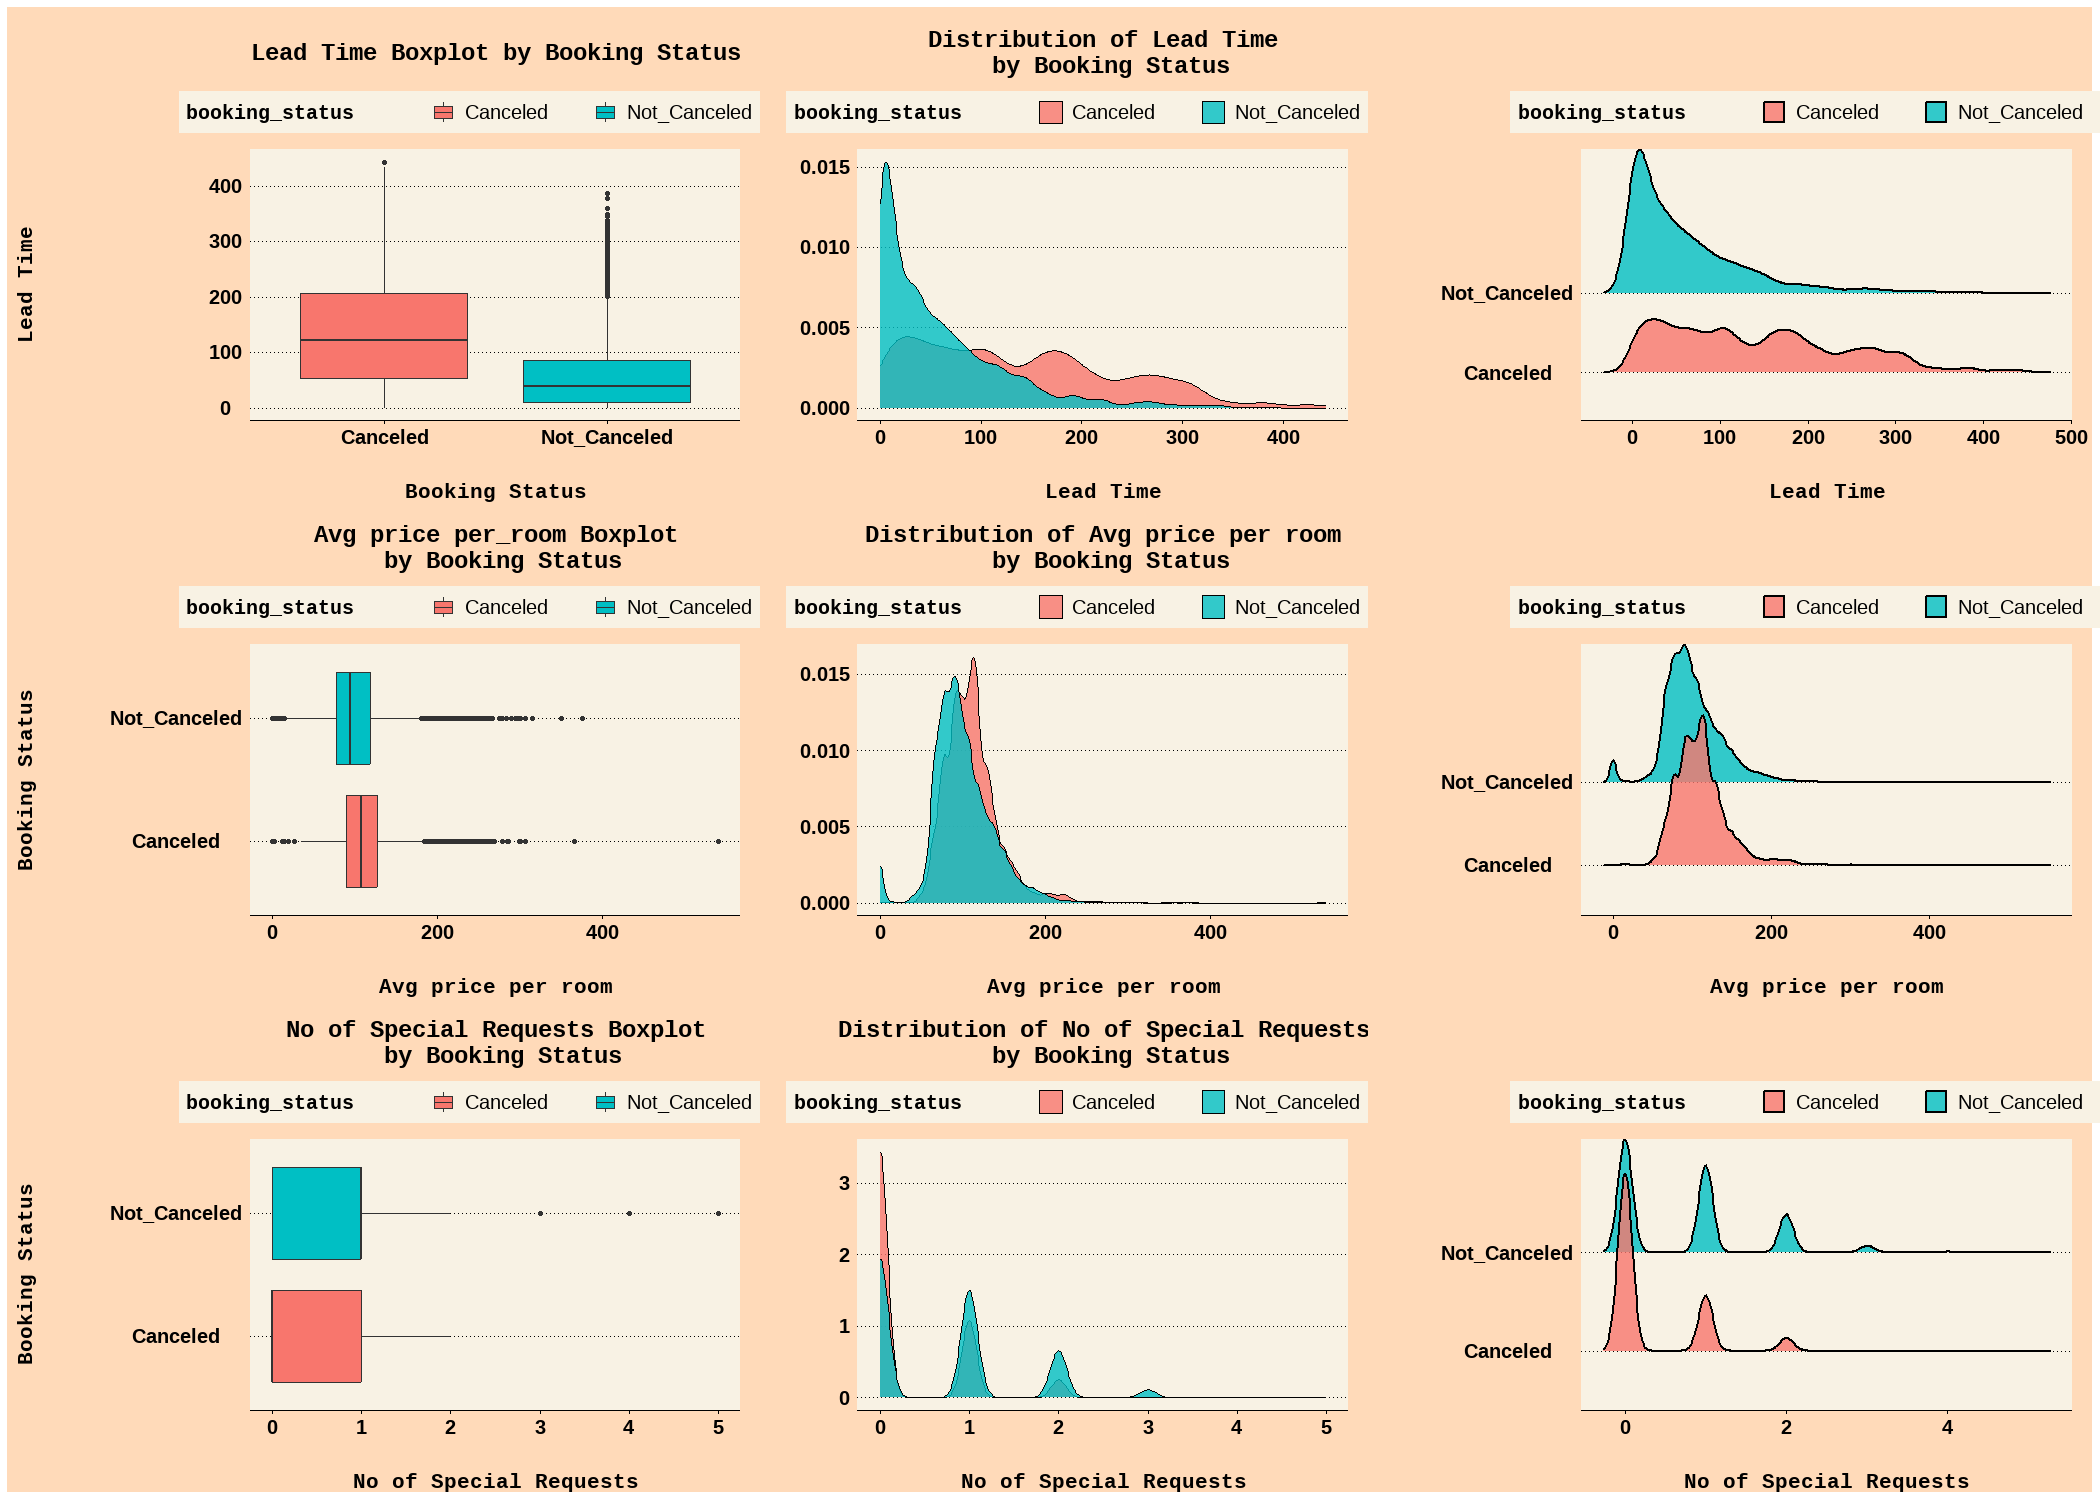

In [39]:
options(repr.plot.width = 21, repr.plot.height = 15, repr.plot.res =100)

grid_arrange =patchwork::wrap_plots(plot_list, ncol = 3)
grid_arrange

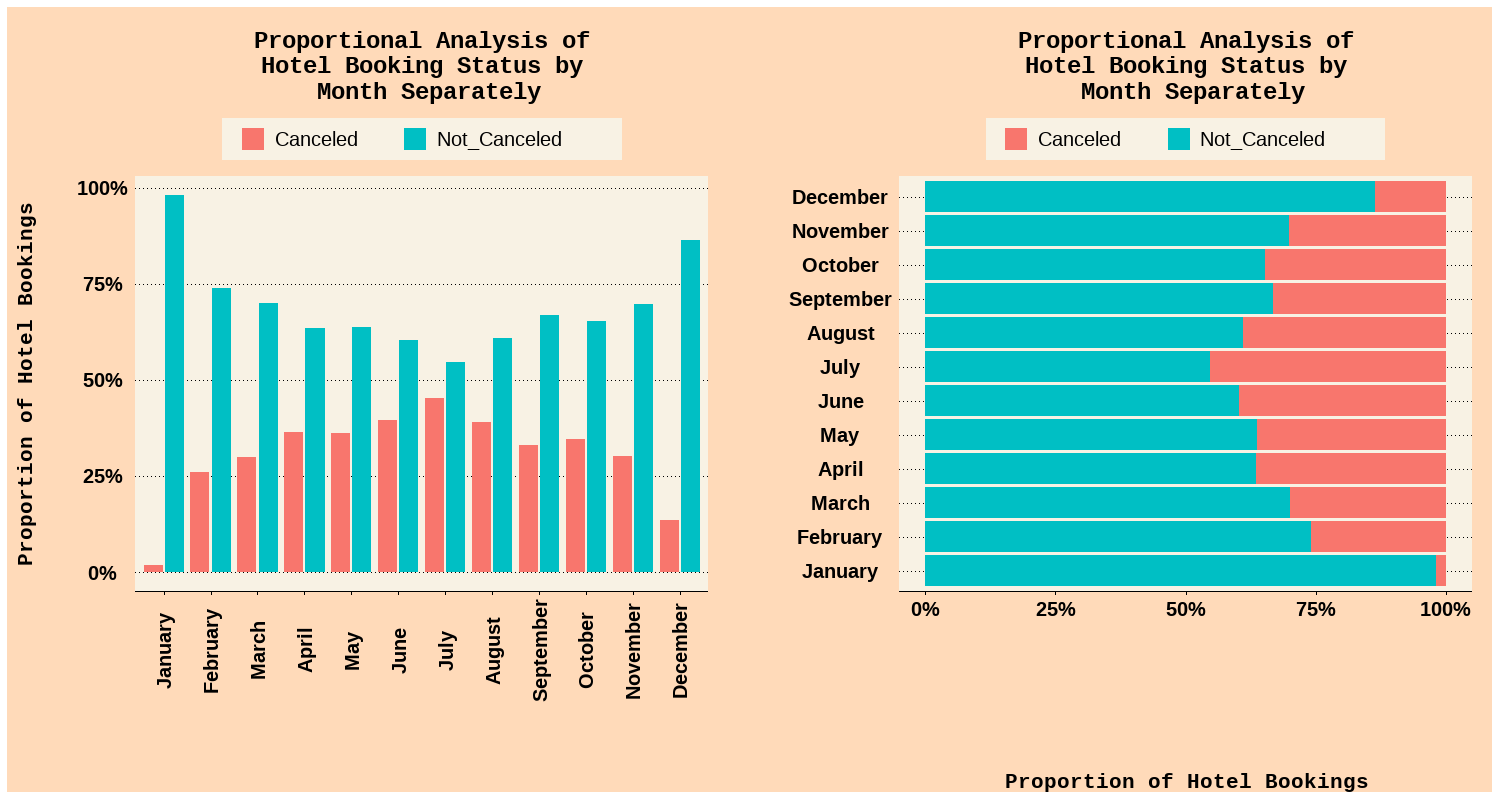

In [40]:
options(repr.plot.width = 15, repr.plot.height = 8, repr.plot.res =100)


tema2 = theme(plot.background = element_rect(fill="#FFDAB9"),
             plot.title = element_text(size=18, hjust = .5),
             axis.title.x = element_text(size=16, color = "black",hjust=.5, vjust=-3,face = "bold"),
             axis.title.y = element_text(size=16, color = "black",hjust=.5, vjust=3,face = "bold"),
             axis.text.x = element_text(size=15,hjust=.5, vjust=0.5,face = "bold",angle = 90),
             axis.text.y = element_text(size=15,face = "bold",hjust=.5),
             legend.text = element_text(size=15, color="black"),
             legend.title = element_text(size=15,face = "bold"))


p1<-df %>%
  count(booking_status, months) %>%
  group_by(months) %>%
  mutate(proportion = n / sum(n)) %>%
  ggplot(aes(x = months, y = proportion, fill = booking_status)) +
  geom_col(position = "dodge2") +
  scale_y_continuous(labels = scales::percent_format()) +
  labs(x = NULL, y = "Proportion of Hotel Bookings", fill = NULL) +
  theme_wsj()+
  tema2 +
  ggtitle("Proportional Analysis of \nHotel Booking Status by\n Month Separately") 


# same plot with coord flip
p2<-df %>%
  count(booking_status, months) %>%
  group_by(months) %>%
  mutate(proportion = n / sum(n)) %>%
  ggplot(aes(x = months, y = proportion, fill = booking_status)) +
  geom_col() +
  scale_y_continuous(labels = scales::percent_format()) +
  labs(x = NULL, y = "Proportion of Hotel Bookings", fill = NULL) +
  theme_wsj()+
  tema +
  ggtitle("Proportional Analysis of \nHotel Booking Status by\n Month Separately")  +
  coord_flip()


plot_list <- list(p1,p2)
grid_arrange =patchwork::wrap_plots(plot_list, ncol = 2)
grid_arrange

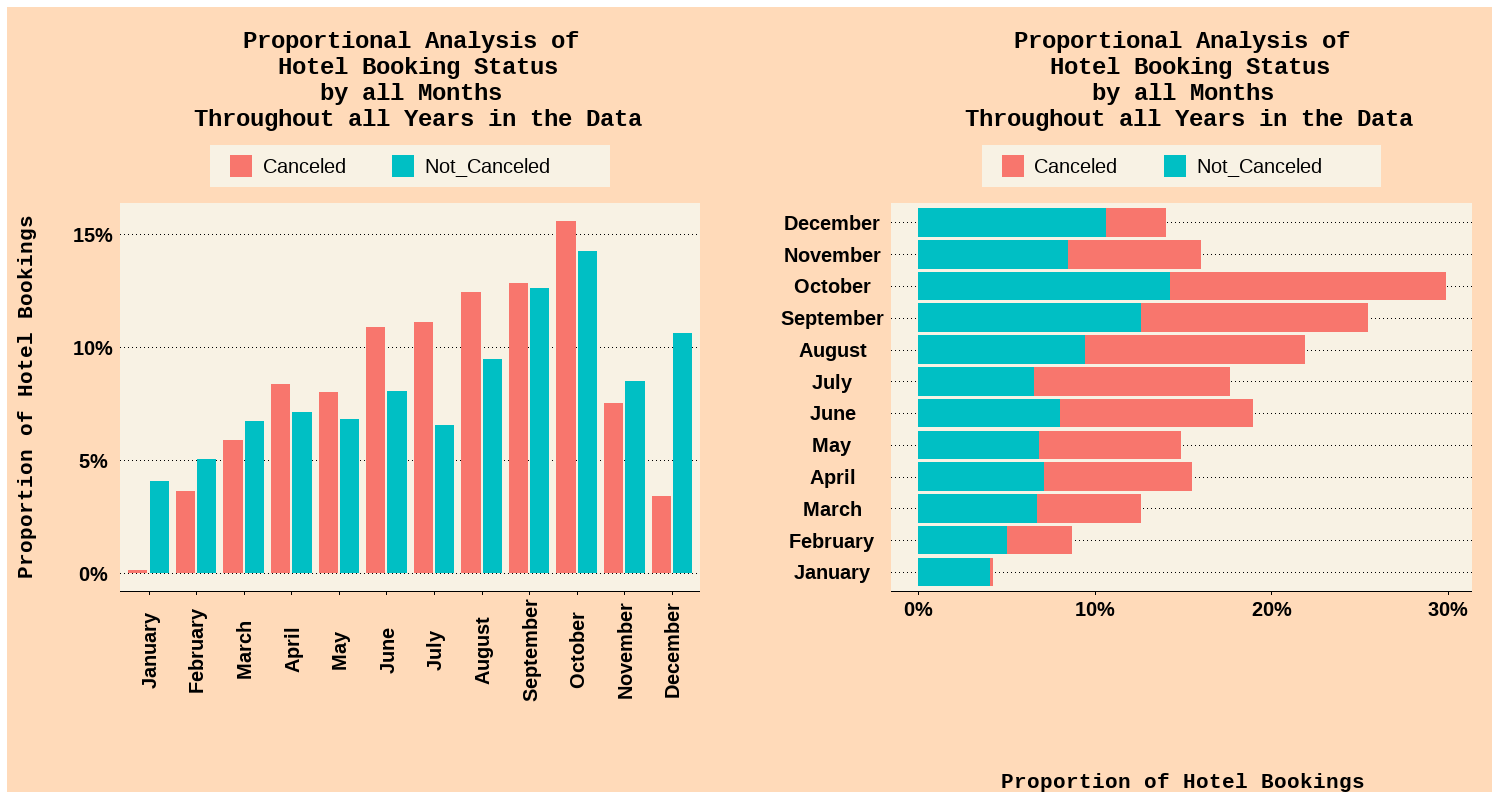

In [41]:
p1<-df %>%
  count(booking_status, months) %>%
  group_by(booking_status) %>% # The proportions are aggregated according to booking status.
  mutate(proportion = n / sum(n)) %>%
  ggplot(aes(x = months, y = proportion, fill = booking_status)) +
  geom_col(position = "dodge2") +
  scale_y_continuous(labels = scales::percent_format()) +
  labs(x = NULL, y = "Proportion of Hotel Bookings", fill = NULL) +
  theme_wsj()+
  tema2 +
  ggtitle("Proportional Analysis of\n Hotel Booking Status\nby all Months\n Throughout all Years in the Data") 

# same plot with coord flip
p2<-df %>%
  count(booking_status, months) %>%
  group_by(booking_status) %>% # The proportions are aggregated according to booking status.
  mutate(proportion = n / sum(n)) %>%
  ggplot(aes(x = months, y = proportion, fill = booking_status)) +
  geom_col() +
  scale_y_continuous(labels = scales::percent_format()) +
  labs(x = NULL, y = "Proportion of Hotel Bookings", fill = NULL) +
  theme_wsj()+
  tema +
  ggtitle("Proportional Analysis of\n Hotel Booking Status\nby all Months\n Throughout all Years in the Data") +
  coord_flip()


plot_list <- list(p1,p2)
grid_arrange =patchwork::wrap_plots(plot_list, ncol = 2)
grid_arrange

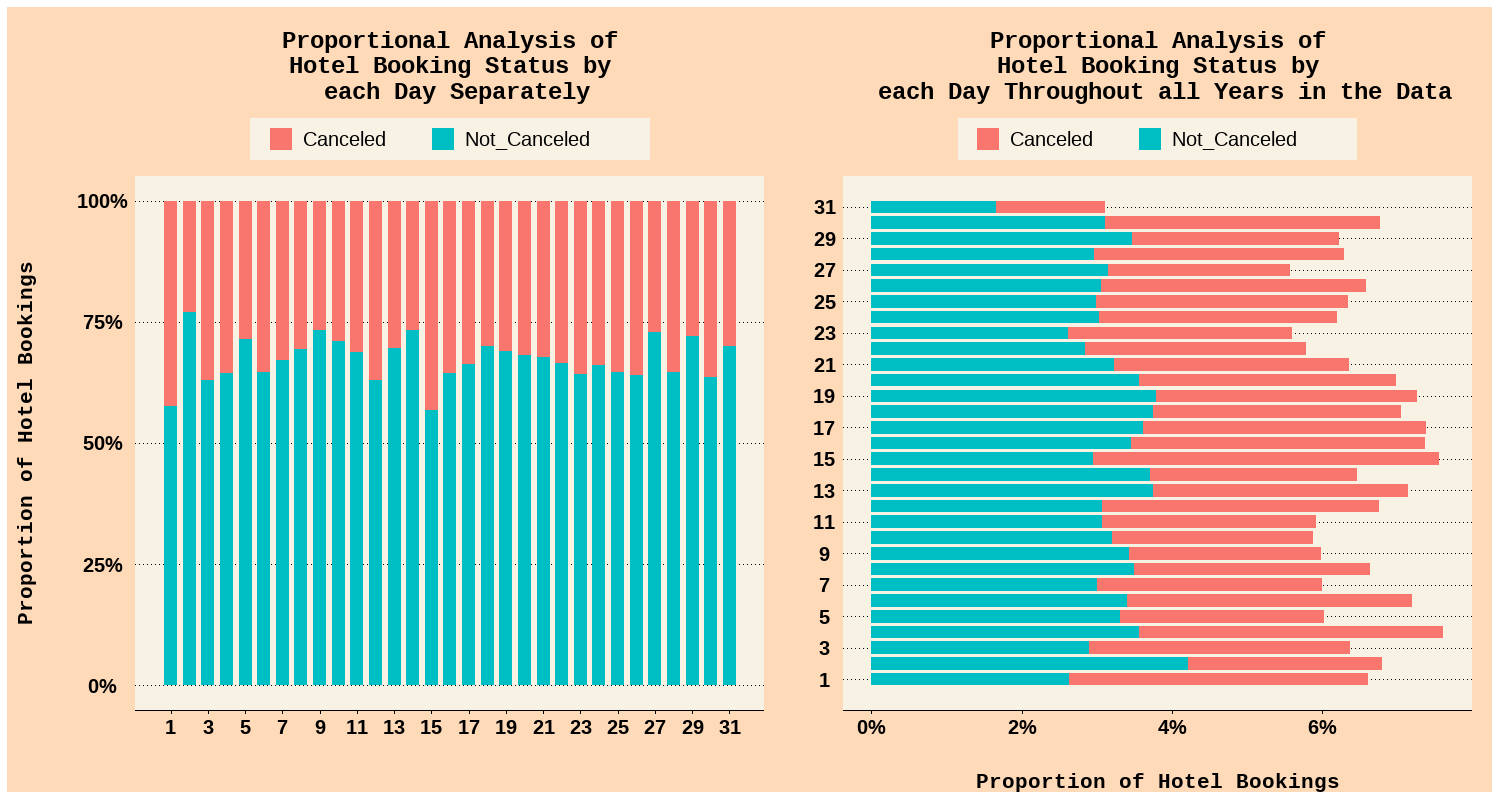

In [42]:
tema3 = theme(plot.background = element_rect(fill="#FFDAB9"),
             plot.title = element_text(size=18, hjust = .5),
             axis.title.x = element_text(size=16, color = "black",hjust=.5, vjust=-3,face = "bold"),
             axis.title.y = element_text(size=16, color = "black",hjust=.5, vjust=3,face = "bold"),
             axis.text.x = element_text(size=15,hjust=.5, vjust=0.5,face = "bold", angle = 0),
             axis.text.y = element_text(size=15,face = "bold",hjust=.5),
             legend.text = element_text(size=15, color="black"),
             legend.title = element_text(size=15,face = "bold"))



p1<-df %>%
  count(booking_status, arrival_date) %>%
  group_by(arrival_date) %>%
  mutate(proportion = n / sum(n)) %>%
  ggplot(aes(x = arrival_date, y = proportion, fill = booking_status)) +
  geom_col(width = .7)+
  scale_y_continuous(labels = scales::percent_format()) +
  scale_x_continuous(breaks = seq(1, 31, by = 2))+
  labs(x = NULL, y = "Proportion of Hotel Bookings", fill = NULL) +
  theme_wsj()+
  tema3 +
  ggtitle("Proportional Analysis of \nHotel Booking Status by\n each Day Separately") 


p2<-df %>%
  count(booking_status, arrival_date) %>%
  group_by(booking_status) %>% # The proportions are aggregated according to booking status.
  mutate(proportion = n / sum(n)) %>%
  ggplot(aes(x = arrival_date, y = proportion, fill = booking_status)) +
  geom_col(width = .8)+
  scale_y_continuous(labels = scales::percent_format()) +
  scale_x_continuous(breaks = seq(1, 31, by = 2))+
  labs(x = NULL, y = "Proportion of Hotel Bookings", fill = NULL) +
  theme_wsj()+
  tema3 +
  ggtitle("Proportional Analysis of \nHotel Booking Status by\n each Day Throughout all Years in the Data") +
  coord_flip()

plot_list <- list(p1,p2)
grid_arrange =patchwork::wrap_plots(plot_list, ncol = 2)
grid_arrange

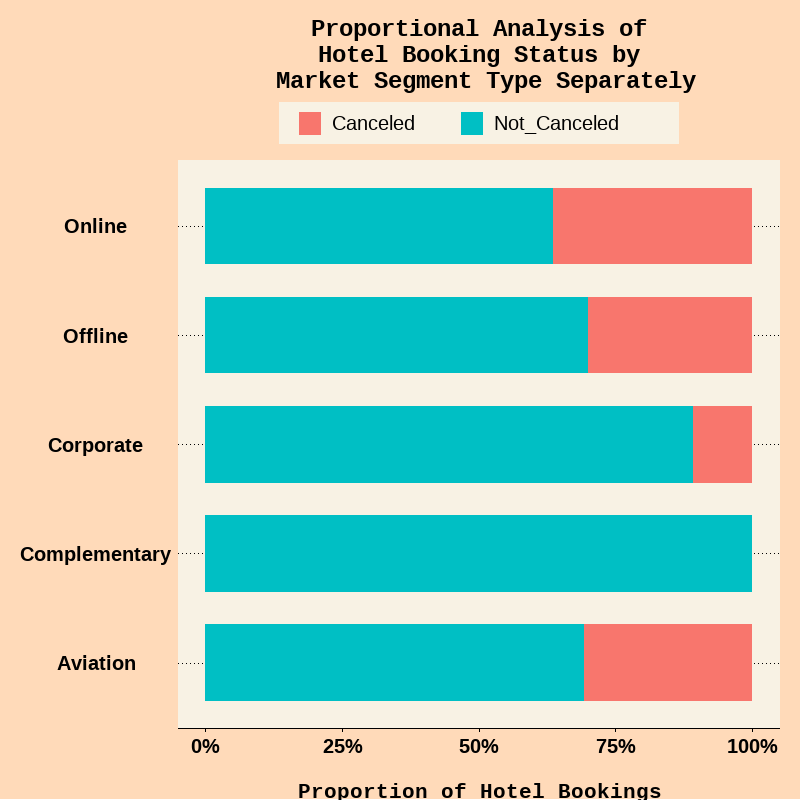

In [43]:
options(repr.plot.width = 8, repr.plot.height = 8, repr.plot.res =100)

df %>%
  count(booking_status, market_segment_type) %>%
  group_by(market_segment_type) %>%
  mutate(proportion = n / sum(n)) %>%
  ggplot(aes(x = market_segment_type, y = proportion, fill = booking_status)) +
  geom_col(width = .7)+
  scale_y_continuous(labels = scales::percent_format()) +
  labs(x = NULL, y = "Proportion of Hotel Bookings", fill = NULL) +
  theme_wsj()+
  tema3 +
  ggtitle("Proportional Analysis of \nHotel Booking Status by\n Market Segment Type Separately") +
  coord_flip()

market_segment_type,booking_status,n,prop
<fct>,<fct>,<int>,<chr>
Aviation,Canceled,31,0.3%
Aviation,Not_Canceled,70,0.4%
Complementary,Not_Canceled,299,1.6%
Corporate,Canceled,165,1.8%
Corporate,Not_Canceled,1365,7.4%
Offline,Canceled,2400,26.6%
Offline,Not_Canceled,5582,30.2%
Online,Canceled,6414,71.2%
Online,Not_Canceled,11185,60.5%


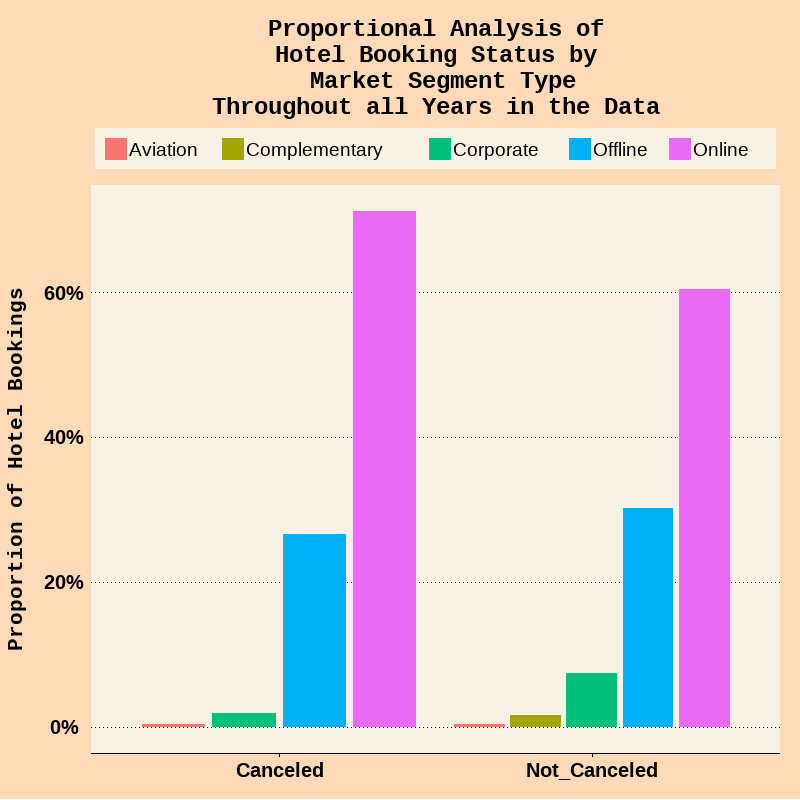

In [44]:
tema4 = theme(plot.background = element_rect(fill="#FFDAB9"),
             plot.title = element_text(size=18, hjust = .5),
             axis.title.x = element_text(size=16, color = "black",hjust=.5, vjust=-3,face = "bold"),
             axis.title.y = element_text(size=16, color = "black",hjust=.5, vjust=3,face = "bold"),
             axis.text.x = element_text(size=15,hjust=.5, vjust=0.5,face = "bold", angle = 0),
             axis.text.y = element_text(size=15,face = "bold",hjust=.5),
             legend.text = element_text(size=14, color="black"),
             legend.title = element_text(size=.5,face = "bold"))
df %>%
  count(booking_status, market_segment_type) %>%
  group_by(booking_status) %>% # # The proportions are aggregated according to booking status.
  mutate(proportion = n / sum(n)) %>%
  ggplot(aes(x = booking_status, y = proportion, fill = market_segment_type)) +
  geom_col(position = "dodge2")+
  scale_y_continuous(labels = scales::percent_format())+
  labs(x = NULL, y = "Proportion of Hotel Bookings", fill = NULL) +
  theme_wsj()+
  tema4 +
  ggtitle("Proportional Analysis of \nHotel Booking Status by\n Market Segment Type \nThroughout all Years in the Data")


df %>% 
  count(market_segment_type, booking_status) %>% 
  group_by(booking_status) %>%
  mutate(prop = scales::percent(n/sum(n), accuracy = 0.1))